In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec

In [2]:
results = pd.read_csv('../main/log/chull.csv', names=["algo", "experiment_id",  "threshold", "dataset", "seed", "generation",
                                        "training_fitness", "timing", "pop_node_count",
                                        "test_fitness",
                                                              "elite_size",
                                                              "distance_chull"])

In [3]:
results.head()

,algo,experiment_id,threshold,dataset,seed,generation,training_fitness,timing,pop_node_count,test_fitness,elite_size,distance_chull
0,SLIM*1SIG,f2a83a12-168b-11ef-9a77-049226d8b1cb,100,yatch,0,0,15.497589,0.073017,1490.0,14.884969,7,1962.001661
1,SLIM*1SIG,f2a83a12-168b-11ef-9a77-049226d8b1cb,100,yatch,0,1,15.378736,0.079386,1968.0,14.561405,7,2233.607323
2,SLIM*1SIG,f2a83a12-168b-11ef-9a77-049226d8b1cb,100,yatch,0,2,15.221442,0.074056,2866.0,14.249313,39,2190.476519
3,SLIM*1SIG,f2a83a12-168b-11ef-9a77-049226d8b1cb,100,yatch,0,3,15.221442,0.076040,3690.0,14.249313,39,2195.840218
4,SLIM*1SIG,f2a83a12-168b-11ef-9a77-049226d8b1cb,100,yatch,0,4,15.103075,0.076018,4636.0,14.075436,97,2176.073049


In [4]:
results = results[results.dataset != '50'].reset_index(drop = True)

In [5]:
results.threshold = results.threshold.astype(int)

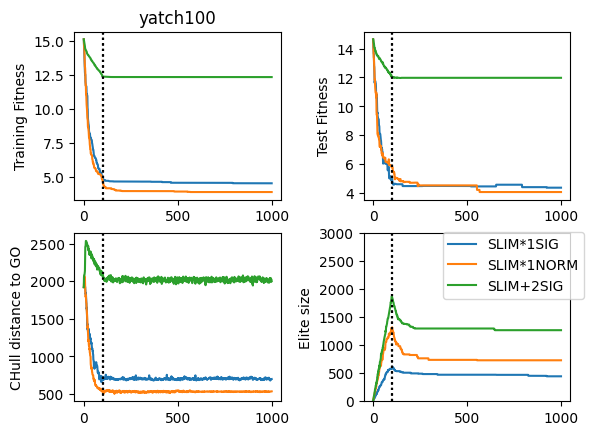

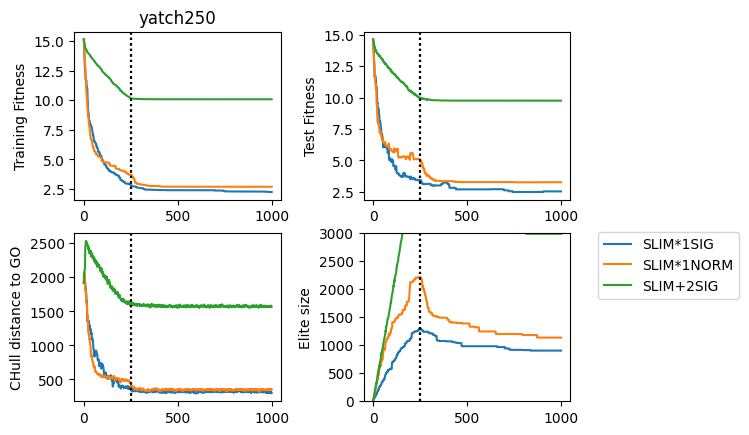

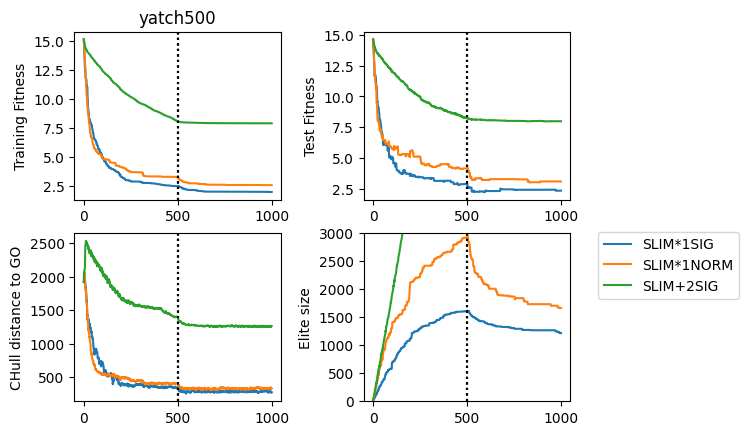

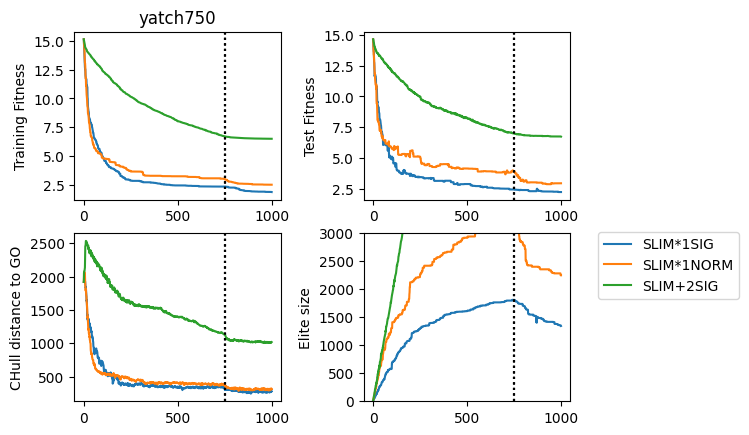

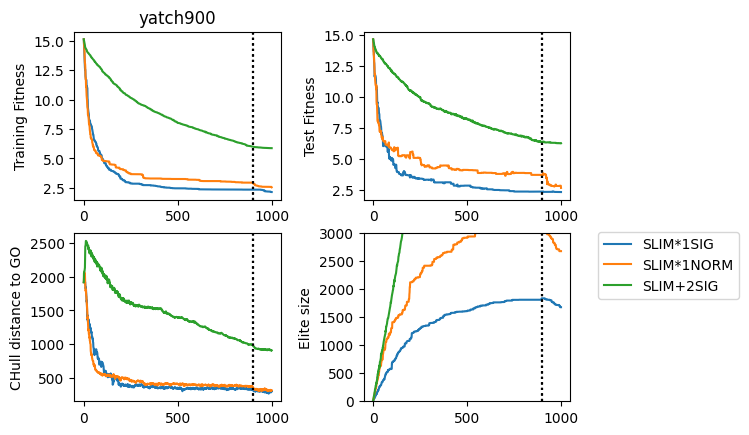

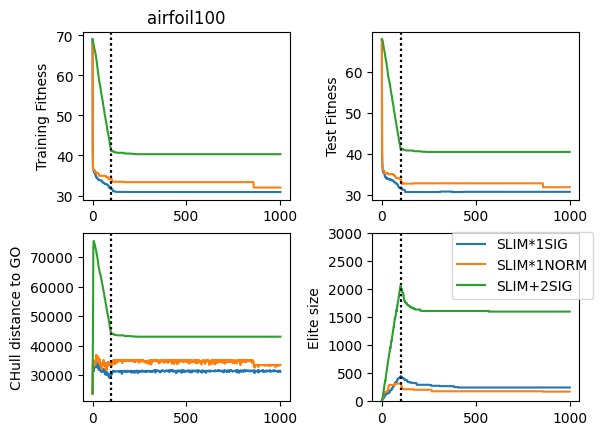

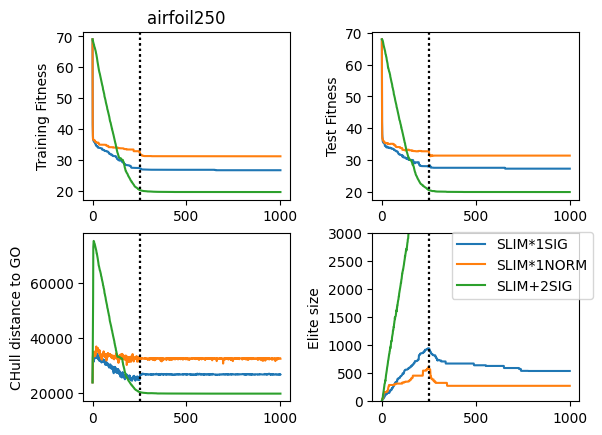

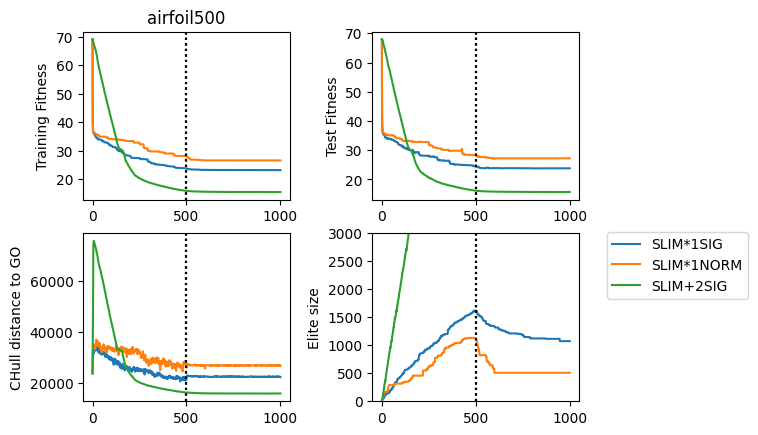

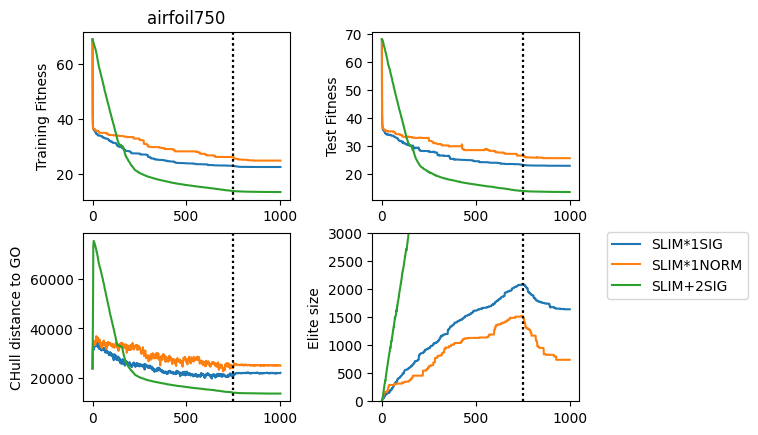

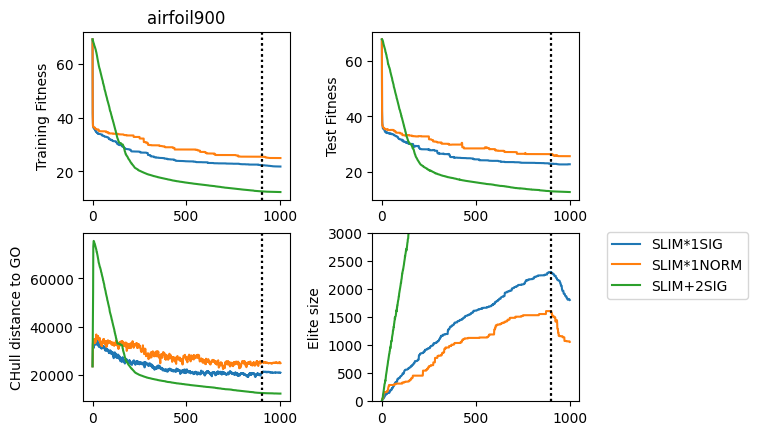

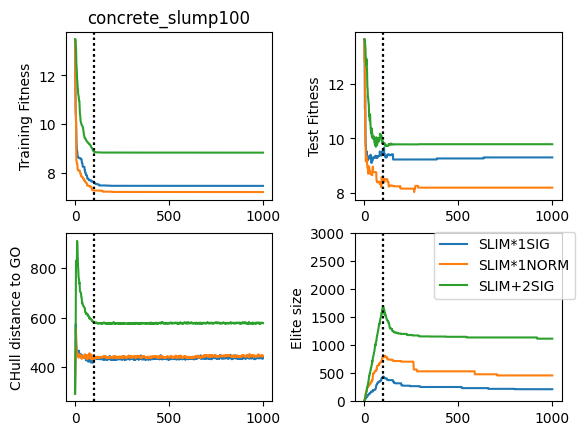

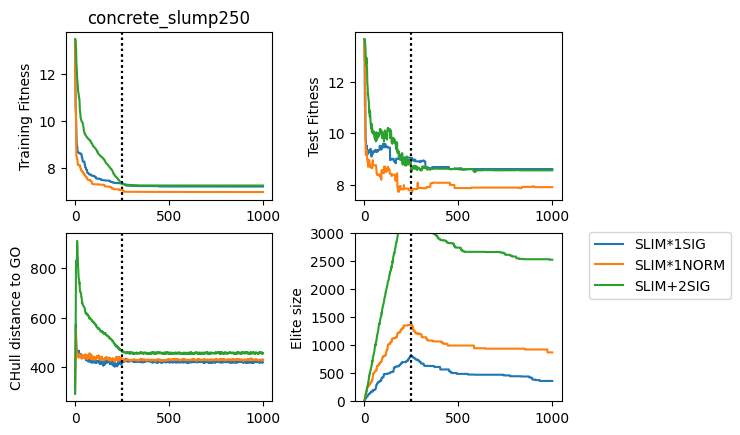

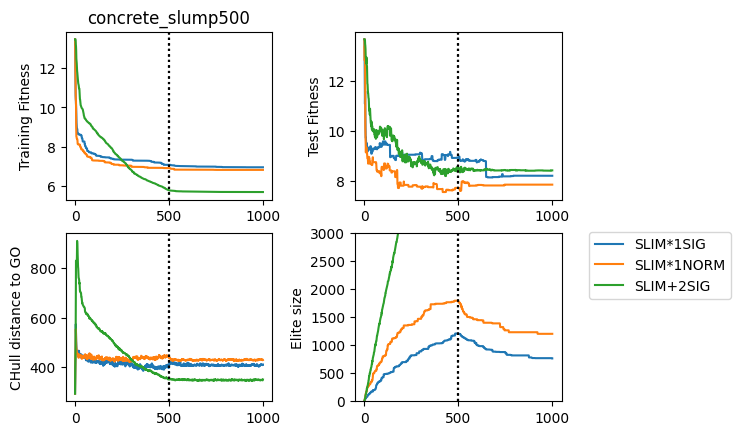

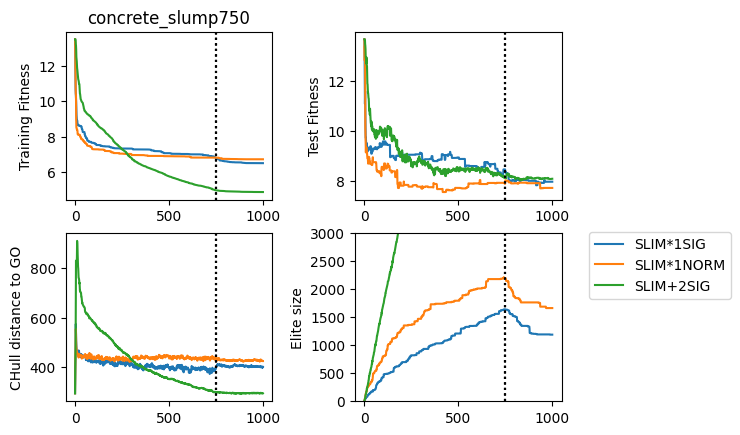

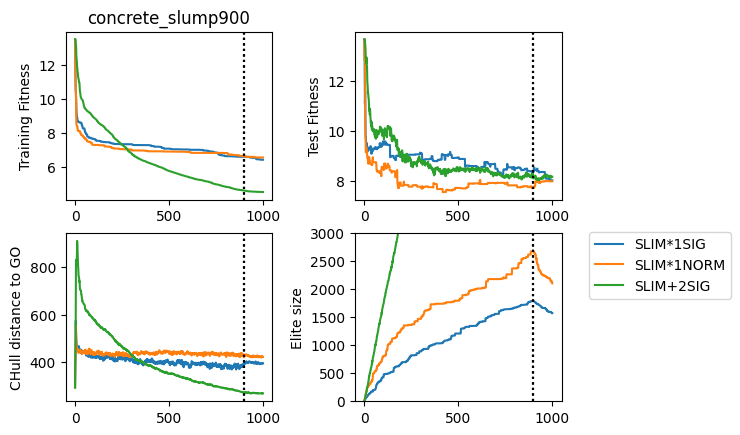

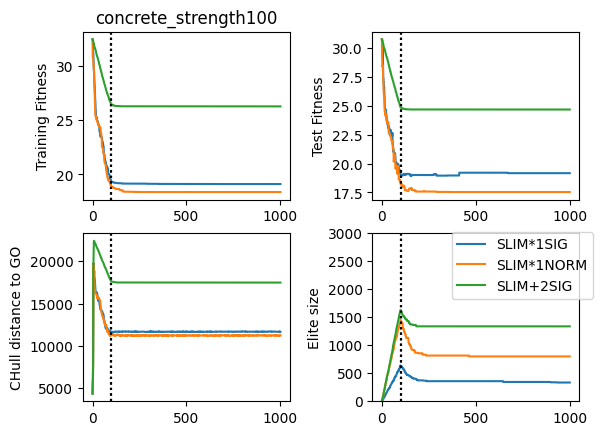

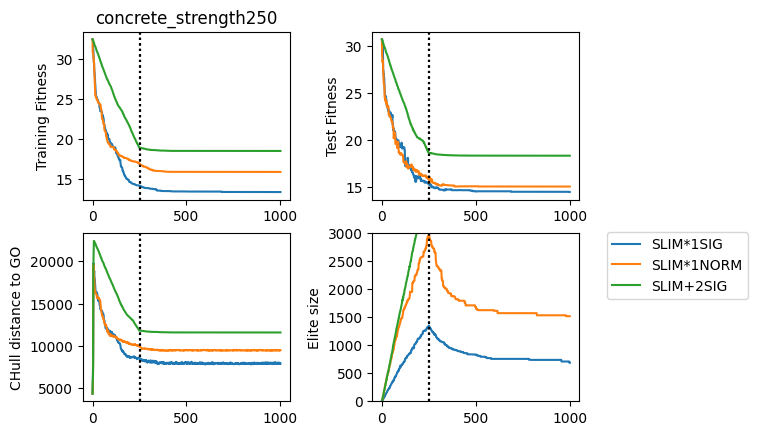

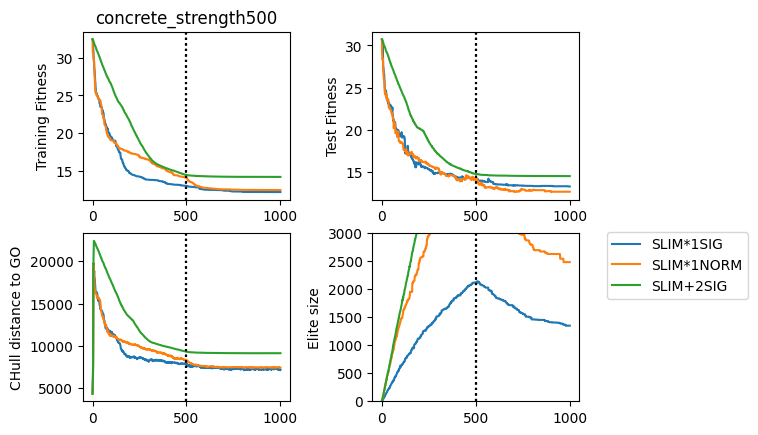

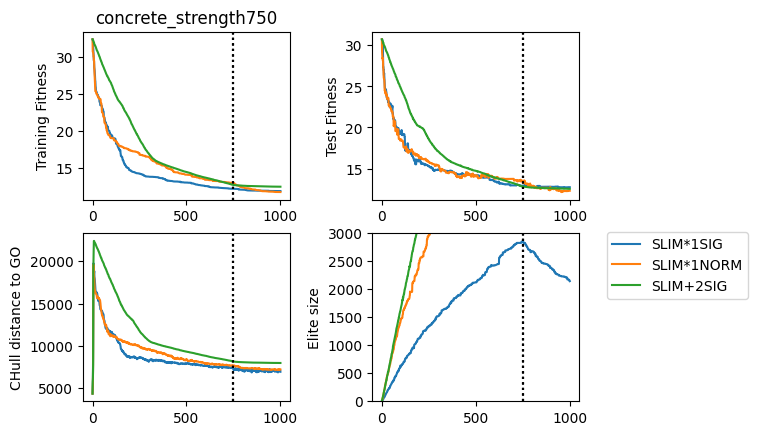

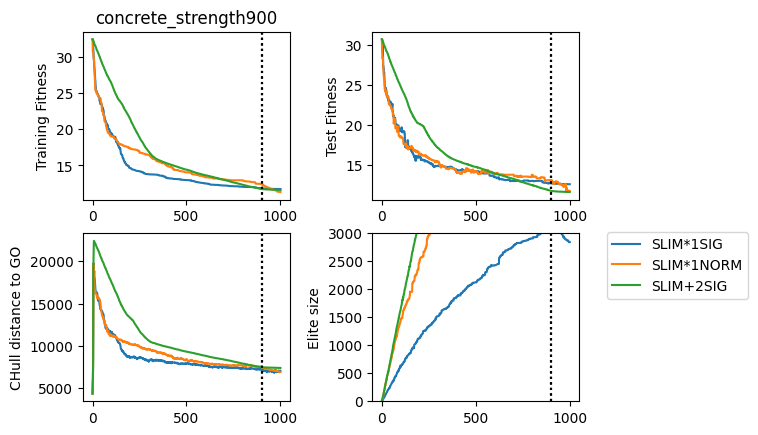

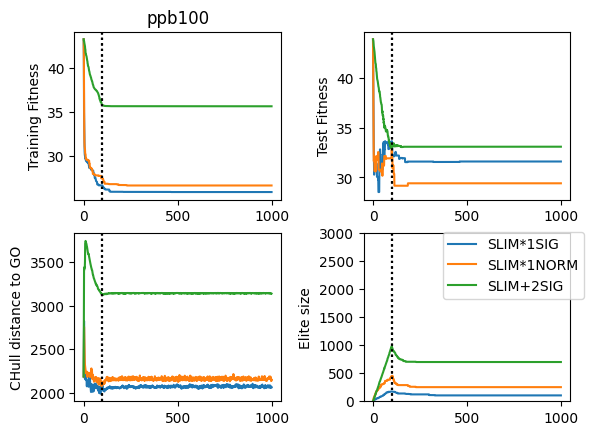

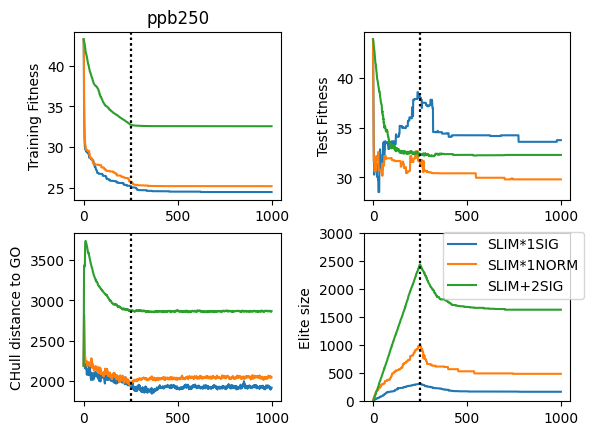

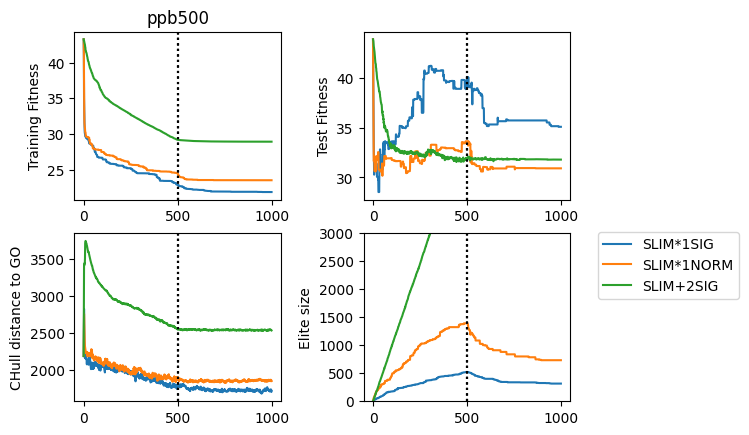

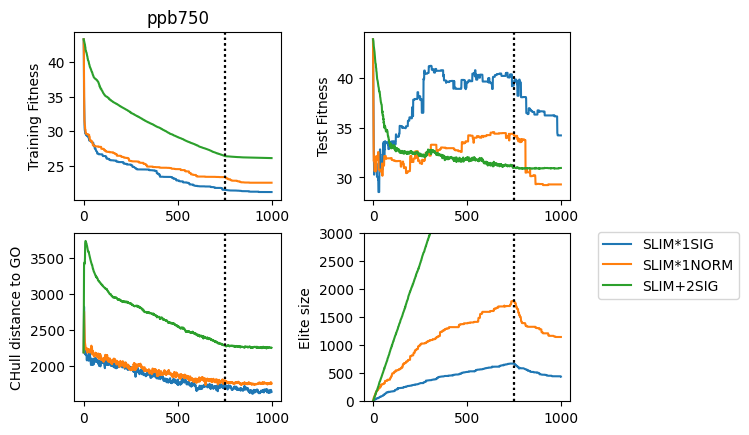

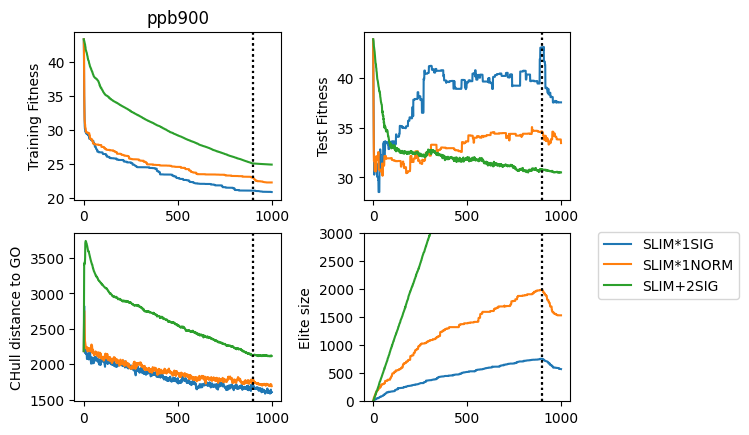

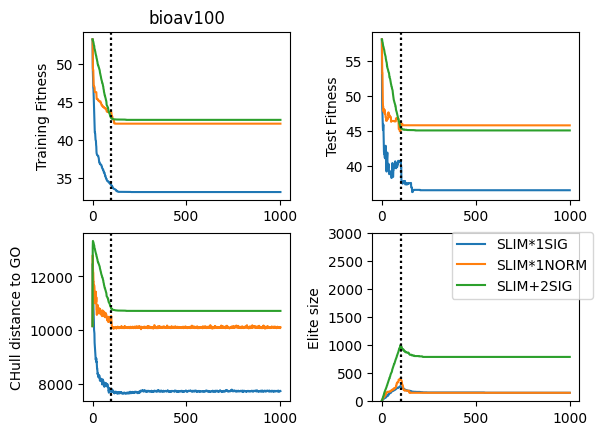

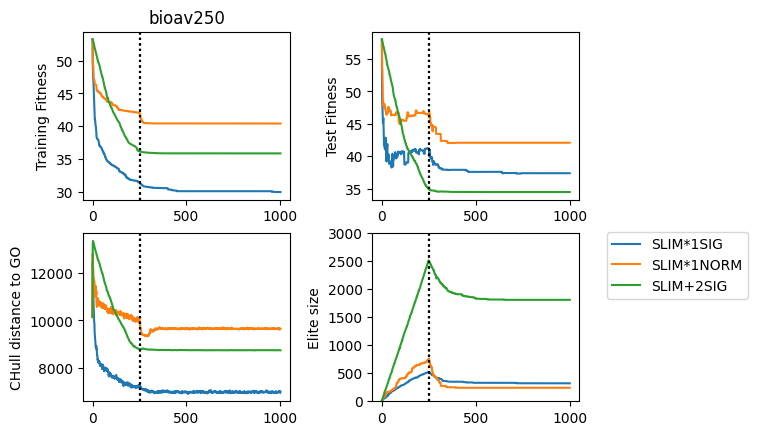

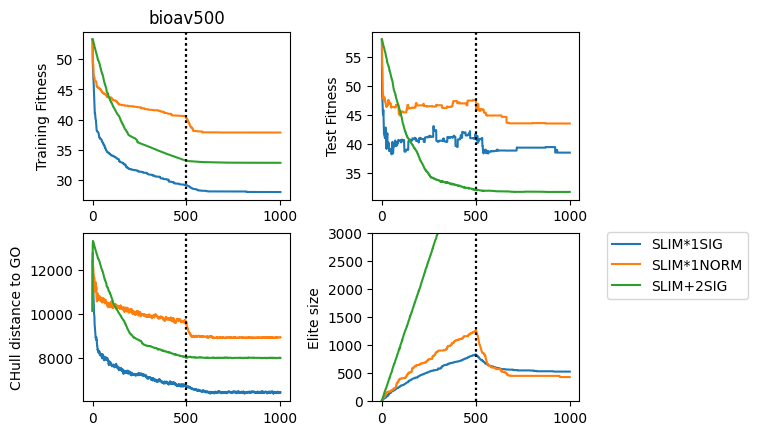

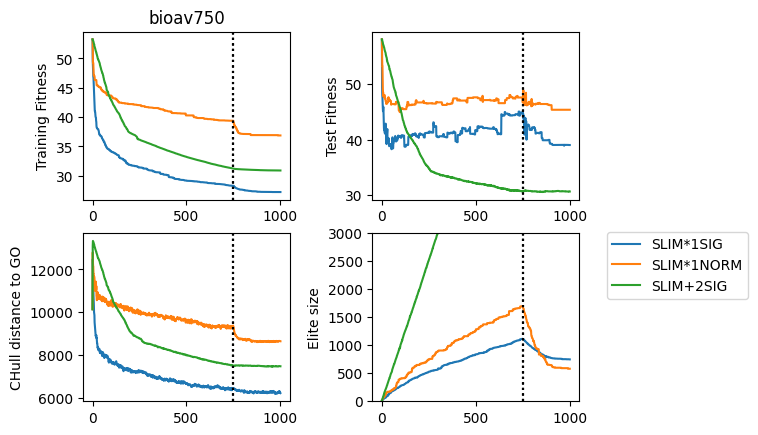

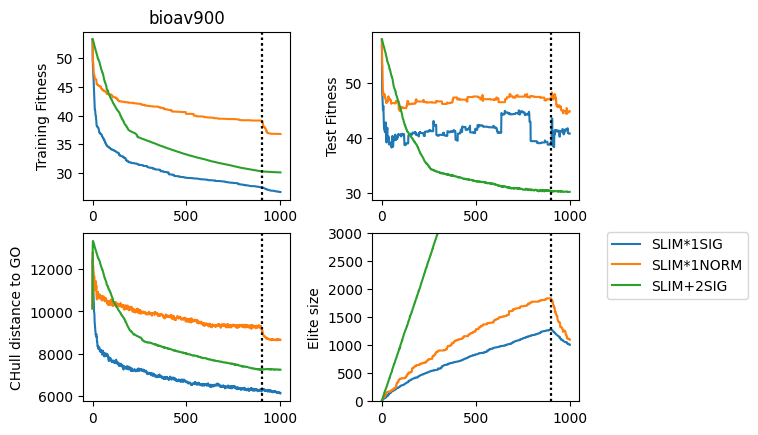

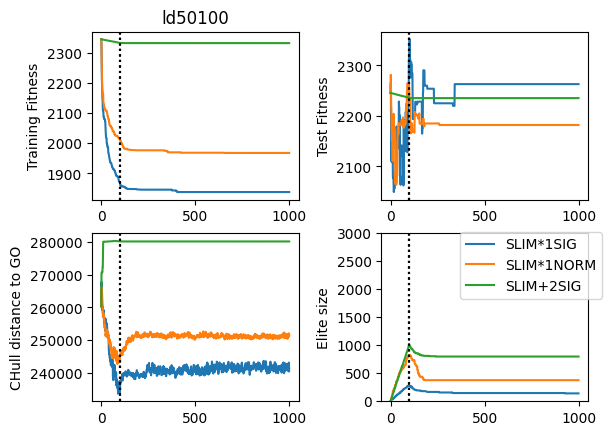

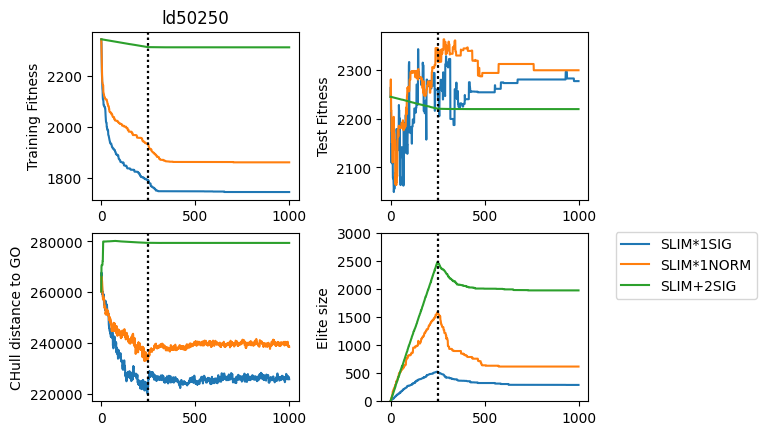

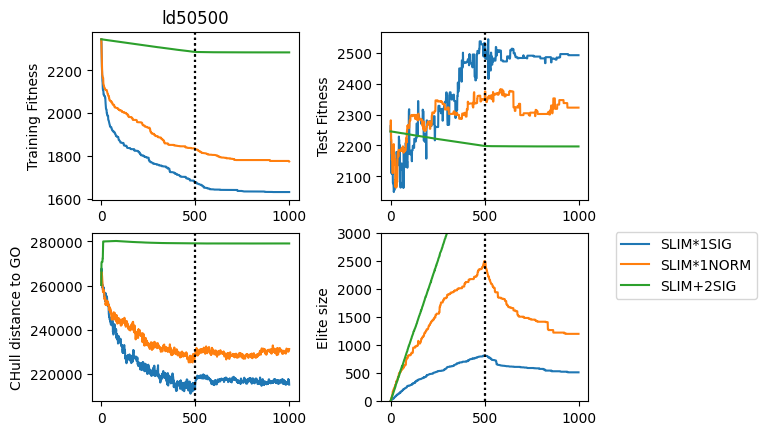

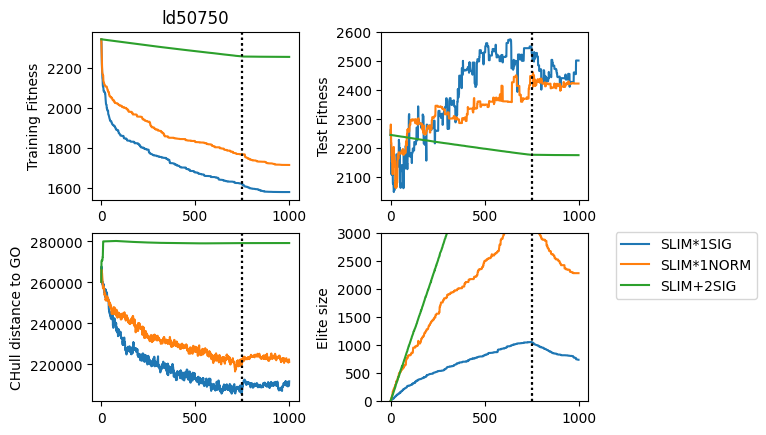

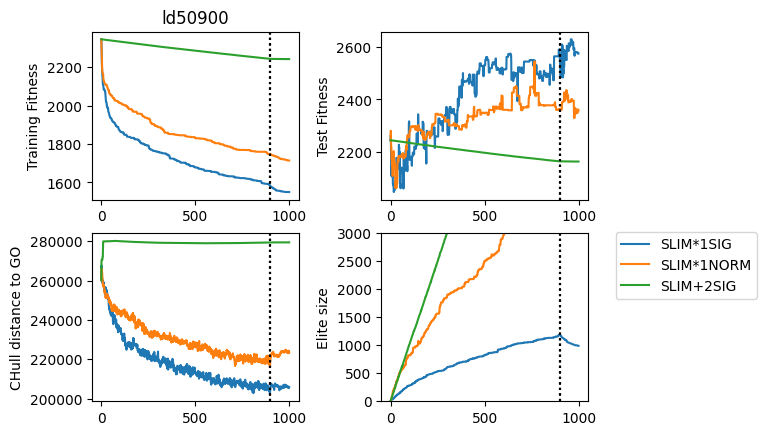

In [6]:
for data in results.dataset.unique():
    for th in results.threshold.unique():
        gs = gridspec.GridSpec(2, 2)
        gs.update( wspace=0.4)
        pl.figure()
        for algo in results.algo.unique():
        
            
            grouped = results.query("algo == @algo and dataset == @data and threshold == @th")[['generation',  "training_fitness","test_fitness", "elite_size", "distance_chull"]].groupby('generation').median()
        
        
            ax1 = pl.subplot(gs[0, 0]) 
            pl.plot(grouped.index, grouped['training_fitness'], label = algo)
            pl.axvline(x = th, linestyle = 'dotted', color = 'black')
            ax1.set_ylabel('Training Fitness')


            ax2 = pl.subplot(gs[0, 1]) 
            pl.plot(grouped.index, grouped['test_fitness'], label = algo)
            pl.axvline(x = th, linestyle = 'dotted', color = 'black')
            ax2.set_ylabel('Test Fitness')
            
            
            ax3 = pl.subplot(gs[1, 0]) 
            pl.plot(grouped.index, grouped['distance_chull'], label = algo)
            pl.axvline(x = th, linestyle = 'dotted', color = 'black')
            ax3.set_ylabel('CHull distance to GO')
            
            ax3 = pl.subplot(gs[1, 1]) #1,1 
            pl.plot(grouped.index, grouped['elite_size'], label = algo)
            pl.axvline(x = th, linestyle = 'dotted', color = 'black')
            ax3.set_ylim(0, 3000)
            ax3.set_ylabel('Elite size')
            



        ax1.set_title(data + str(th))
        ax3.legend(bbox_to_anchor=(1.1, 1.05))
        plt.show()